<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [34]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [35]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [36]:
# Exploramos los valores de 'species'
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [37]:
# Incorporamos las restricciones solicitadas, quitamos los espacios y dejamos todo en minuscula
df['species'] = df['species'].str.strip()
df['species'] = df['species'].str.lower()
df.loc[df['species'].isnull(),'species'] = 'default'
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

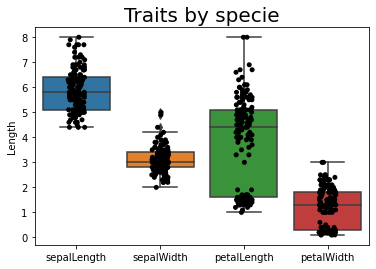

In [38]:
# Reemplazamos los valores nan por 0 y graficamos
df.loc[df['species']=='default','species'] = 0
df_traits = df.drop(['species'], axis=1)
sns.boxplot(data=df_traits) # grafico de caja
sns.stripplot(data=df_traits, color='black') # grafico de distribucion de cada producto
plt.ylabel('Length') # etiqueta eje Y
plt.title('Traits by specie', fontsize=20) # titulo
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [39]:
# Filtros
sL = (df['sepalLength']>=4.0) & (df['sepalLength']<=7.0)
sW = (df['sepalWidth']>=2.0) & (df['sepalWidth']<=4.5)
pL = (df['petalLength']>=1.0) & (df['petalLength']<=7.0)
pW = (df['petalWidth']>=0.1) & (df['petalWidth']<=2.5)

philter = sL & sW & pL & pW

# Columna 'label' con el filtro
df.insert(
        len(df.columns), # posicion de la columna (al final)
        'label', # nombre columna a insertar
        philter, # datos de la columna ajustados por el filtro
        True
        )
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

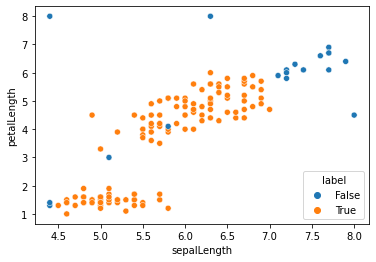

In [42]:
# Grafico de Length
sns.scatterplot(
    data = df, # data 
    x = 'sepalLength', # eje X: sepal 
    y = 'petalLength', # eje Y: petal
    hue = 'label' # color por 'label'
)
plt.show()

Gracias al boxplot y al scatterplot se nota que 'petal' ocupa más rango en valores numéricos (entre 1.0 y 6.0 app.) y 'sepal' ocupa un rango más acotado, pero mayor, (entre 4.5 y 7.0 app.). La mayor concentración de valores se encuentra en la nube central (entre 4.0 y 7.0 de Length).

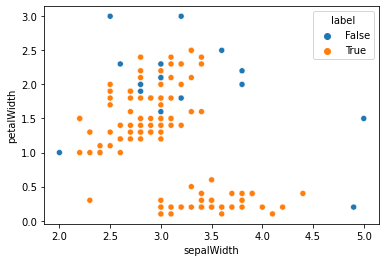

In [51]:
# Grafico de Width
sns.scatterplot(
    data = df, # data 
    x = 'sepalWidth', # eje X: sepal 
    y = 'petalWidth', # eje Y: petal
    hue = 'label' # color por 'label'
)
plt.show()

Gracias al boxplot y al scatterplot se nota que 'petal' ocupa un rango de valores numéricos similar (entre 0.0 y 2.5 app.) al que 'sepal' ocupa (entre 2.0 y 4.5 app.). Existen dos nubes donde se concentran los datos (entre 1.0 y 2.5 de Width y entre 3.0 y 4.5 de Width).

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

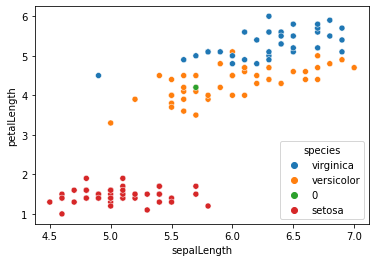

In [49]:
# Grafico de Length
sns.scatterplot(
    data = df.loc[df['label']==True], # data con filtro
    x = 'sepalLength', # eje X: sepal 
    y = 'petalLength', # eje Y: petal
    hue = 'species' # categoria por 'species'
)
plt.show()